<a href="https://colab.research.google.com/github/DeepCodeSec/ml1000-p2/blob/wine-quality-white/project2_wine_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project 2 - Cluster wines based on their chemical constituents

**Objective** The objective of this study is to use clustering analysis to try and find associations within physicochemical properties in white wines. We will try to find interesting things that our client LCBO can use to increase sales. We use the white wine quality dataset retrieved from the UCI Machine learning repository: https://archive.ics.uci.edu/ml/datasets/Wine+Quality.


#Install Packages and Load in Dataset


In [1]:
%pip install pycaret
%pip install pandas_profiling 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pycaret-2.3.10-py3-none-any.whl (320 kB)
  Using cached scikit_plot-0.3.7-py3-none-any.whl (33 kB)
  Using cached spacy-2.3.9-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (5.0 MB)
  Using cached umap-learn-0.5.3.tar.gz (88 kB)
  Preparing metadata (setup.py) ... done
  Using cached PyYAML-5.4.1-cp38-cp38-manylinux1_x86_64.whl (662 kB)
  Using cached scipy-1.5.4-cp38-cp38-manylinux1_x86_64.whl (25.8 MB)
  Using cached pandas_profiling-3.6.6-py2.py3-none-any.whl (324 kB)
  Using cached pyod-1.0.7.tar.gz (147 kB)
  Preparing metadata (setup.py) ... done
  Using cached kmodes-0.12.2-py2.py3-none-any.whl (20 kB)
  Using cached imbalanced_learn-0.7.0-py3-none-any.whl (167 kB)
  Using cached lightgbm-3.3.5-py3-none-manylinux1_x86_64.whl (2.0 MB)
  Using cached Boruta-0.3-py3-none-any.whl (56 kB)
  Using cached pyLDAvis-3.4.0-py3-none-any.whl (2.6 MB)
  Using cached sci

#Importing the Dataset

In [2]:
# Link or path to the dataset to use
df_path = "https://github.com/DeepCodeSec/ml1000-p1/blob/main/data/winequality-white.csv?raw=true" #@param {type:"string"}


In [3]:
#load csv into dataframe
import pandas as pd

dataset = pd.read_csv(df_path, 
                      sep=';') #the separater in the raw data is ;. need to indicate so columns are found
dataset.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

The code below automatically creates an exploratory data analysis report which is output as an html file in the local files. What follows are the highlights of this EDA report: 

#Exploratory Data Analysis

In [4]:
#Load libraries for exploratory analysis
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt

pr = ProfileReport(dataset)
pr.to_file(output_file="EDA.html")

<ipython-input-4-f2a825195cc6>:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
#check the shape of data
dataset.shape

(4898, 12)

In [6]:
#check the shape of data
dataset.drop_duplicates()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
6               6.2              0.32         0.16             7.0      0.045   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
6                    30.0                 136.0  0.99490  3.18       0.47   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         8.8        6  
1         9.5        6  
2        10.1        6  
3         9.9        6  
6         9.6        6  
...       ...      ...  
4893     11.2        6  
4894      9.6        5  
4895      9.4        6  
4896     12.8        7  
4897     11.8        6  

[3961 rows x 12 columns]

In [7]:
#see a details about the data
dataset.describe().T

count        mean        std      min         25%  \
fixed acidity         4898.0    6.854788   0.843868  3.80000    6.300000   
volatile acidity      4898.0    0.278241   0.100795  0.08000    0.210000   
citric acid           4898.0    0.334192   0.121020  0.00000    0.270000   
residual sugar        4898.0    6.391415   5.072058  0.60000    1.700000   
chlorides             4898.0    0.045772   0.021848  0.00900    0.036000   
free sulfur dioxide   4898.0   35.308085  17.007137  2.00000   23.000000   
total sulfur dioxide  4898.0  138.360657  42.498065  9.00000  108.000000   
density               4898.0    0.994027   0.002991  0.98711    0.991723   
pH                    4898.0    3.188267   0.151001  2.72000    3.090000   
sulphates             4898.0    0.489847   0.114126  0.22000    0.410000   
alcohol               4898.0   10.514267   1.230621  8.00000    9.500000   
quality               4898.0    5.877909   0.885639  3.00000    5.000000   

                            50%       75%        max  
fixed acidity           6.80000    7.3000   14.20000  
volatile acidity        0.26000    0.3200    1.10000  
citric acid             0.32000    0.3900    1.66000  
residual sugar          5.20000    9.9000   65.80000  
chlorides               0.04300    0.0500    0.34600  
free sulfur dioxide    34.00000   46.0000  289.00000  
total sulfur dioxide  134.00000  167.0000  440.00000  
density                 0.99374    0.9961    1.03898  
pH                      3.18000    3.2800    3.82000  
sulphates               0.47000    0.5500    1.08000  
alcohol                10.40000   11.4000   14.20000  
quality                 6.00000    6.0000    9.00000

In [8]:
#basic structure of dataframe
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [9]:
#see number of missing values for each column
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
dataset.skew()

fixed acidity           0.647751
volatile acidity        1.576980
citric acid             1.281920
residual sugar          1.077094
chlorides               5.023331
free sulfur dioxide     1.406745
total sulfur dioxide    0.390710
density                 0.977773
pH                      0.457783
sulphates               0.977194
alcohol                 0.487342
quality                 0.155796
dtype: float64

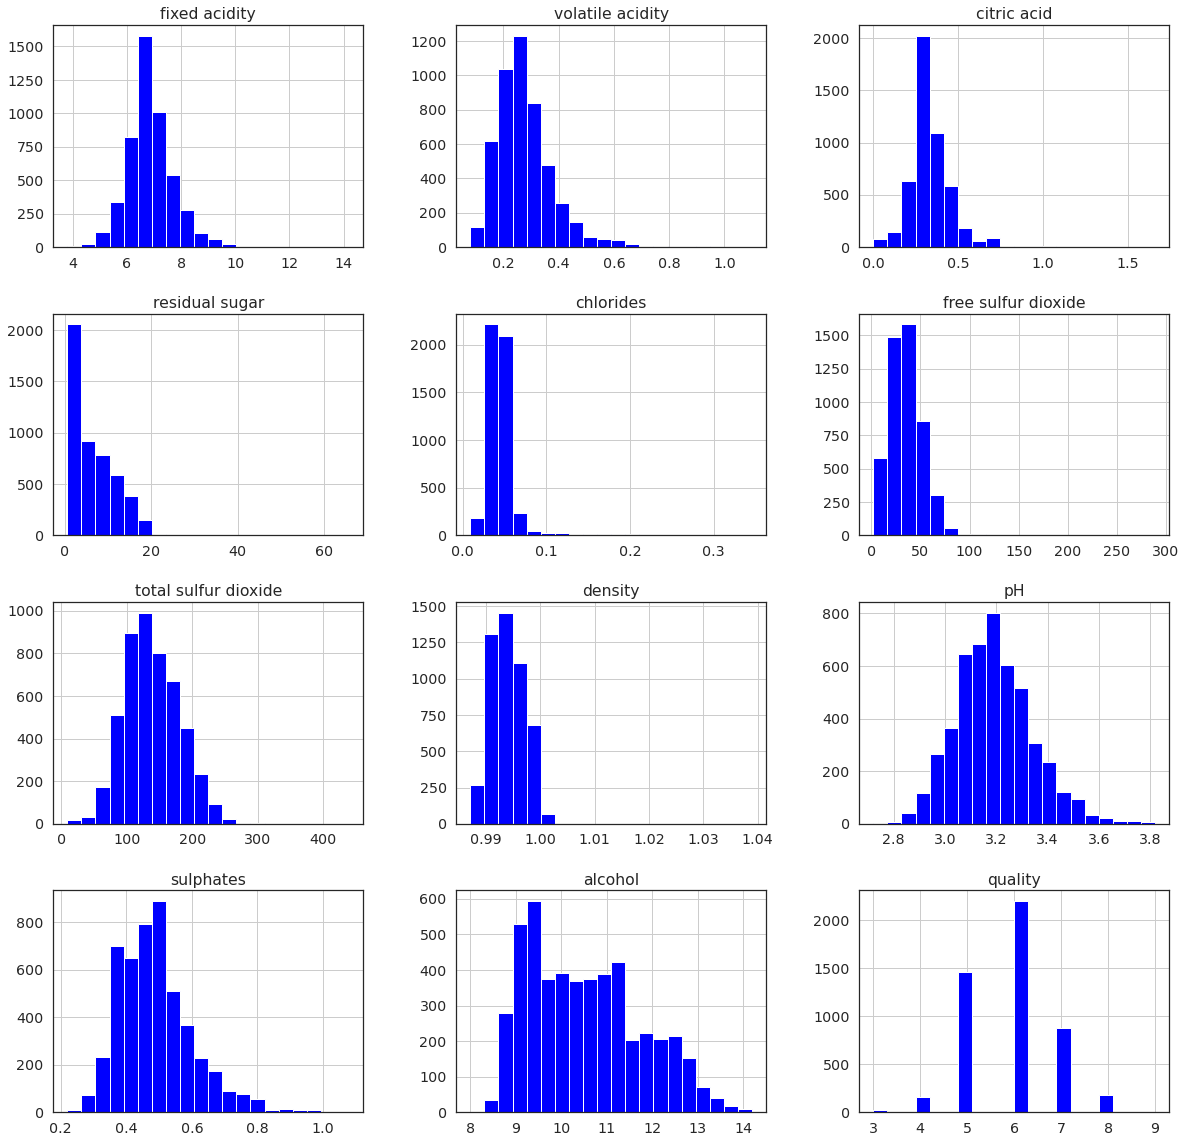

In [11]:
#ploting histograms to better visualize the distributions of every feature for better insights
import seaborn as sns

sns.set(style='white',font_scale=1.3, rc={'figure.figsize':(20,20)})
ax=dataset.hist(bins=20,color='blue' )

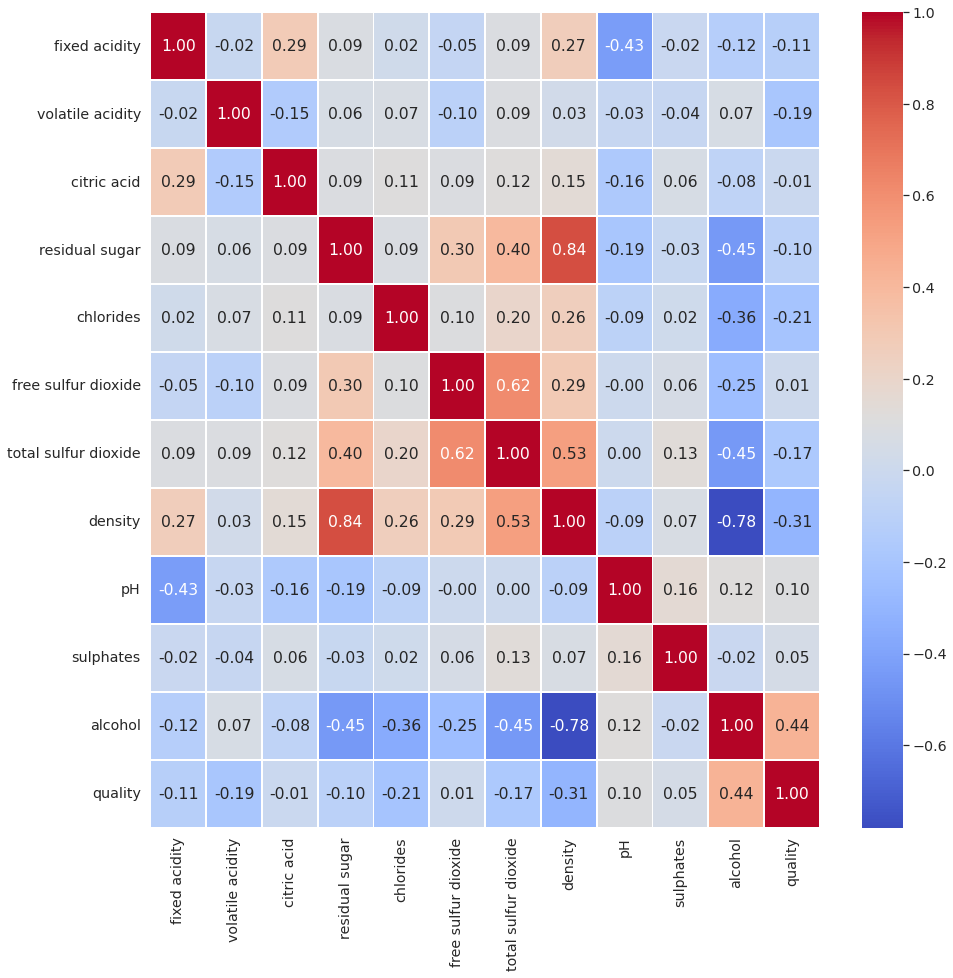

In [12]:
plt.figure(figsize=(15,15))
sns.heatmap(dataset.corr(),annot=True,fmt=".2f",linewidths=0.7,cmap="coolwarm")
plt.show()

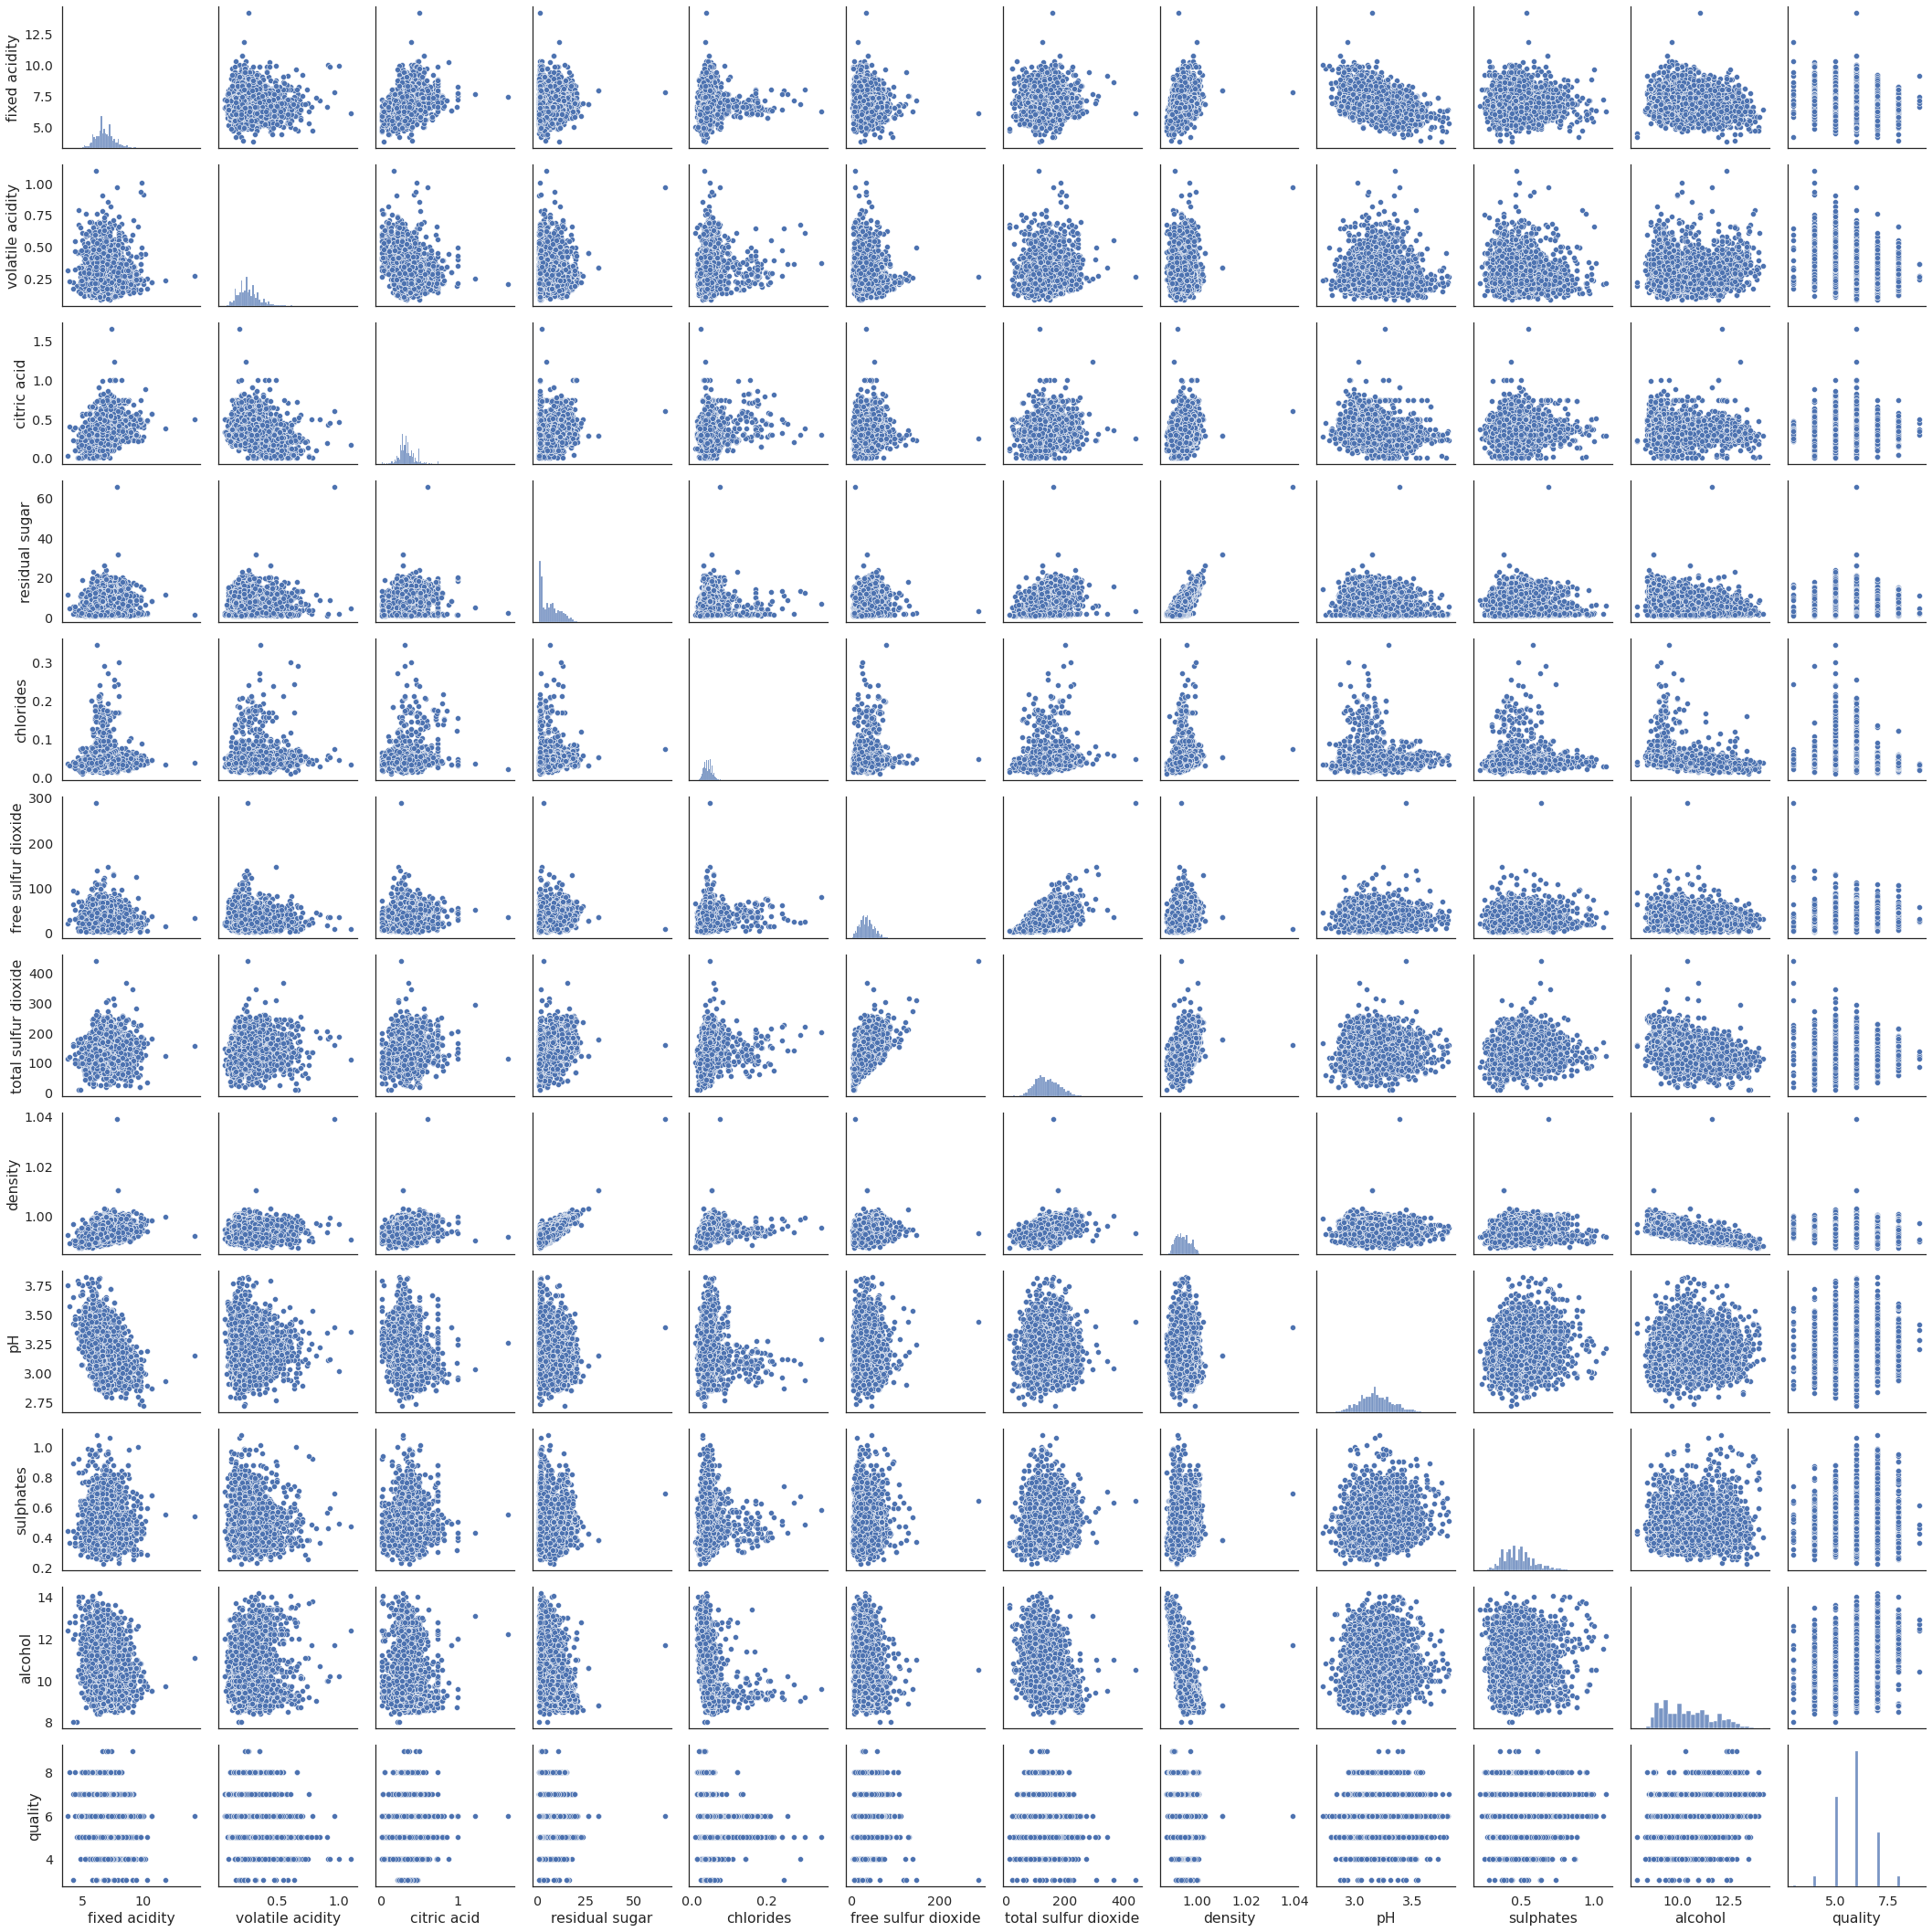

In [13]:
#create the default pairplot
sns.pairplot(dataset)
plt.show()

**Summary of Data**

* 12 variables
* 4898 observations
* 772 duplicate rows
* No missing values
* High Correlations:
> * residual sugar is highly correlated with density
> * chlorides is highly correlated with density and alcohol
> * free sulfur dioxide is highly overall correlated with total sulfur dioxide
> * total sulfur dioxide is highly overall correlated with free sulfur dioxide and density
> * density is highly overall correlated with residual sugar, chlorides, total sulfur dioxide and alcohol.
> * alcohol is highly overall correlated with chorides and density
* There are widely different ranges. On one extreme, chlorides has a range of 0.009 - 0.346, while free sulfur dioxide has a range of 2 - 289.

A sample of 5% has been withheld from the original dataset to be used for predictions at the end of the experiment.

In [14]:
# Split the data into 95% and 5%
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (4653, 12)
Unseen Data For Predictions: (245, 12)


In [15]:
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.9              0.28         0.49             7.7      0.045   
1            5.0              0.24         0.19             5.0      0.043   
2            8.3              0.26         0.31             2.0      0.029   
3            7.7              0.25         0.30             7.8      0.038   
4            4.4              0.32         0.39             4.3      0.030   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 48.0                 195.0  0.99540  3.04       0.55   
1                 17.0                 101.0  0.99438  3.67       0.57   
2                 14.0                 141.0  0.99077  2.95       0.77   
3                 67.0                 196.0  0.99555  3.10       0.50   
4                 31.0                 127.0  0.98904  3.46       0.36   

   alcohol  quality  
0     11.0        6  
1     10.0        5  
2     12.2        6  
3     10.1        5  
4     12.8        8

In [16]:
data_unseen.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            8.1              0.28         0.40             6.9      0.050   
1            8.6              0.23         0.40             4.2      0.035   
2            6.6              0.16         0.40             1.5      0.044   
3            7.4              0.34         0.42             1.1      0.033   
4            6.0              0.19         0.26            12.4      0.048   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 30.0                  97.0   0.9951  3.26       0.44   
1                 17.0                 109.0   0.9947  3.14       0.53   
2                 48.0                 143.0   0.9912  3.54       0.52   
3                 17.0                 171.0   0.9917  3.12       0.53   
4                 50.0                 147.0   0.9972  3.30       0.36   

   alcohol  quality  
0     10.1        6  
1      9.7        5  
2     12.4        7  
3     11.3        6  
4      8.9        6

## Data Cleaning

Here we make our data cleaning decisions. We have decided to leave the duplicates in because they they are likely combinations of variable values and should get a higher weight because of it. The data does not contain any missing values, so no imputation or row removal was needed. Exploratory data analysis revealed the numeric features have varying scales and several are non-normally distributed. We will address both in the experiment setup section. Finally, we need to check the data for outliers.

### Outlier analysis

Two options: 
1.   When lots of observations in dataset and only a few rows with outlier values (for any column), just remove rows containing outliers. Alternatively, we leave the feww outliers as is because they may be potentially informative.

2.   When fewer observations and more rows containing outlier values, cap the values at the 5th and 95th percentiles.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


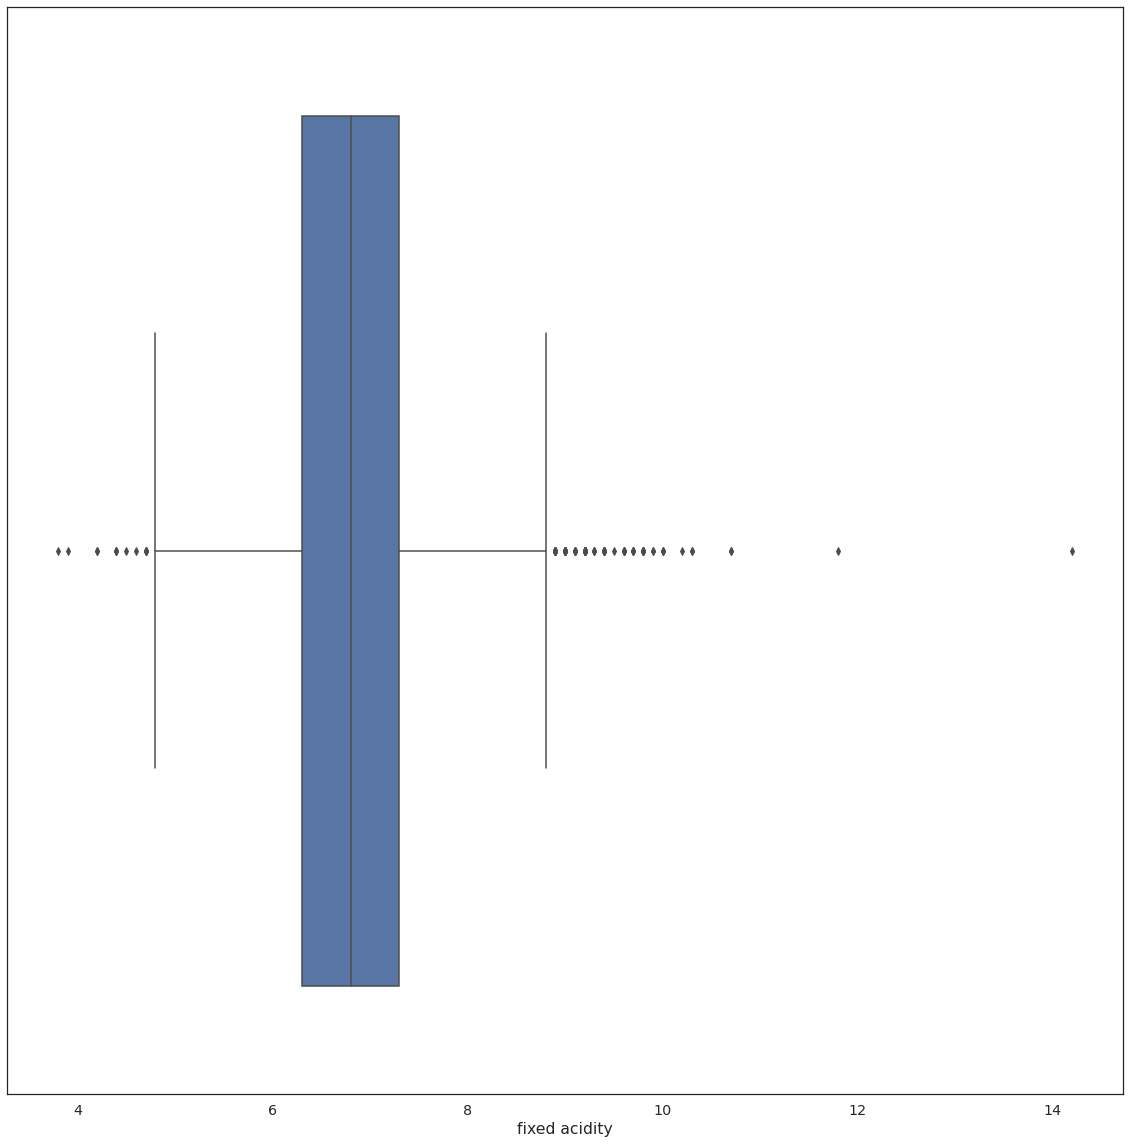

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


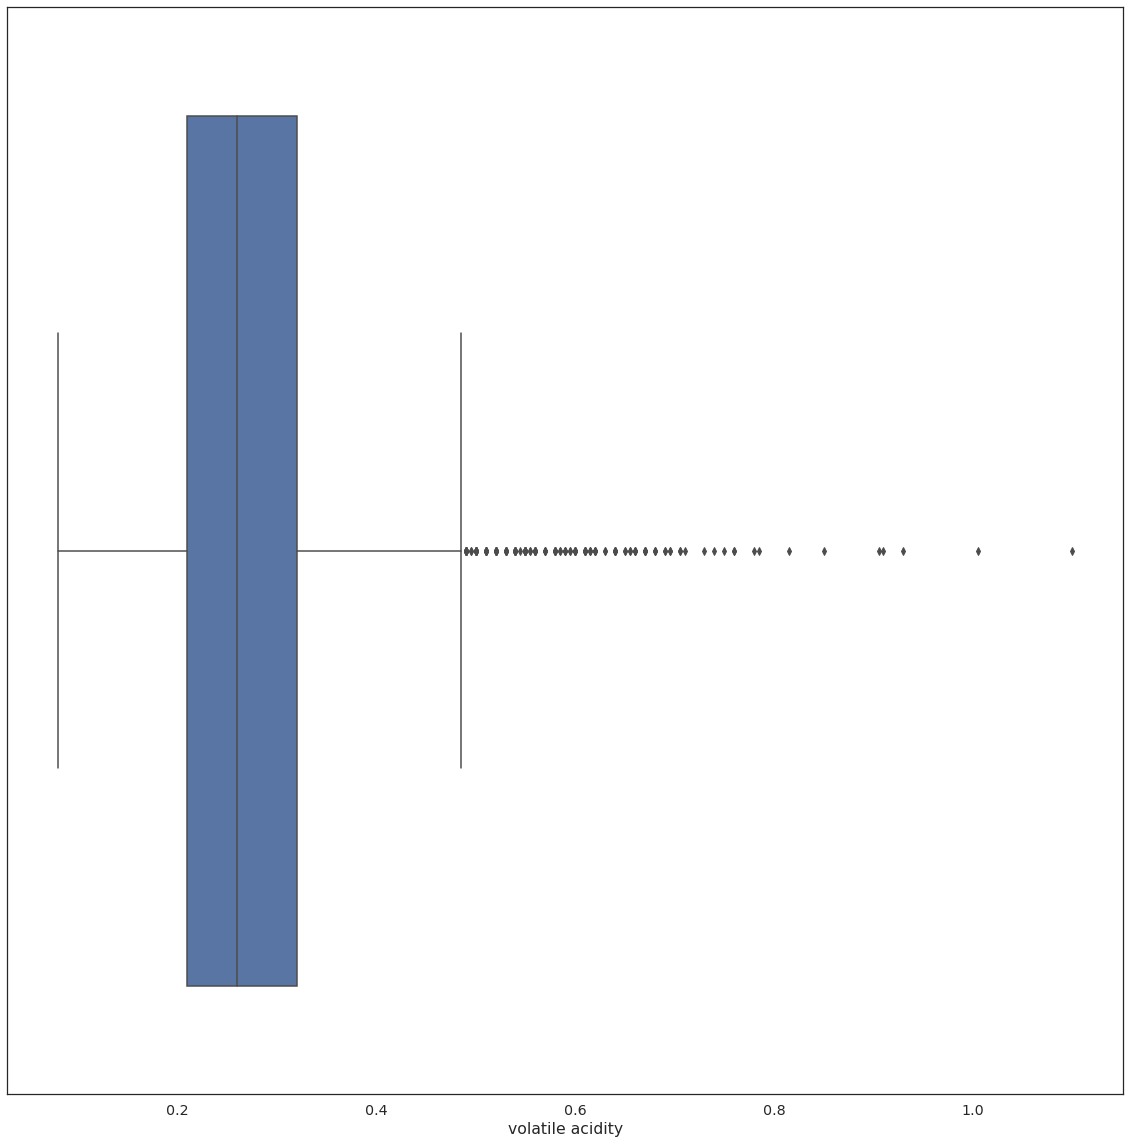

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


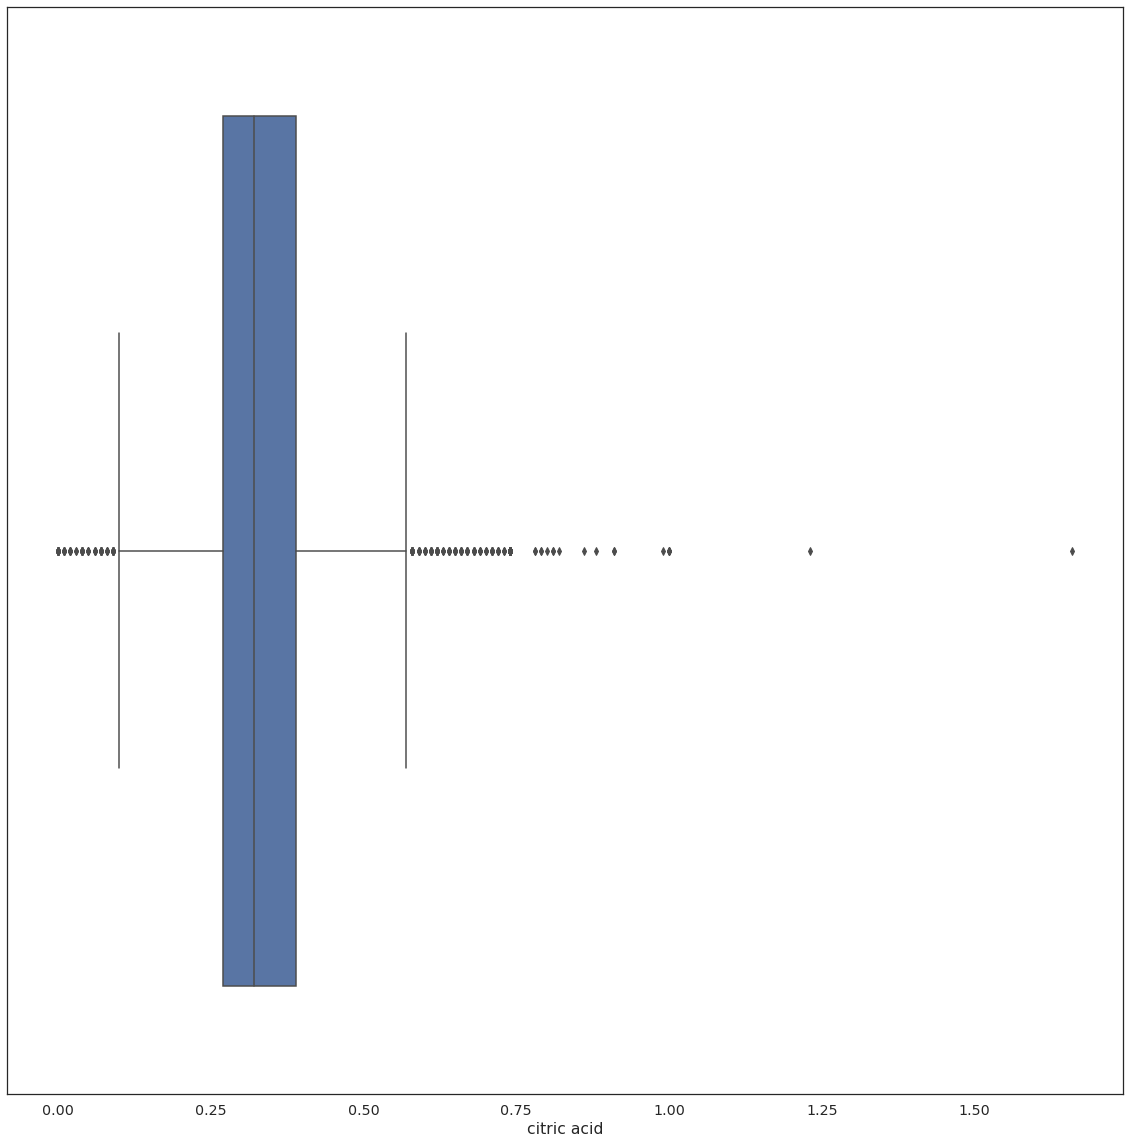

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


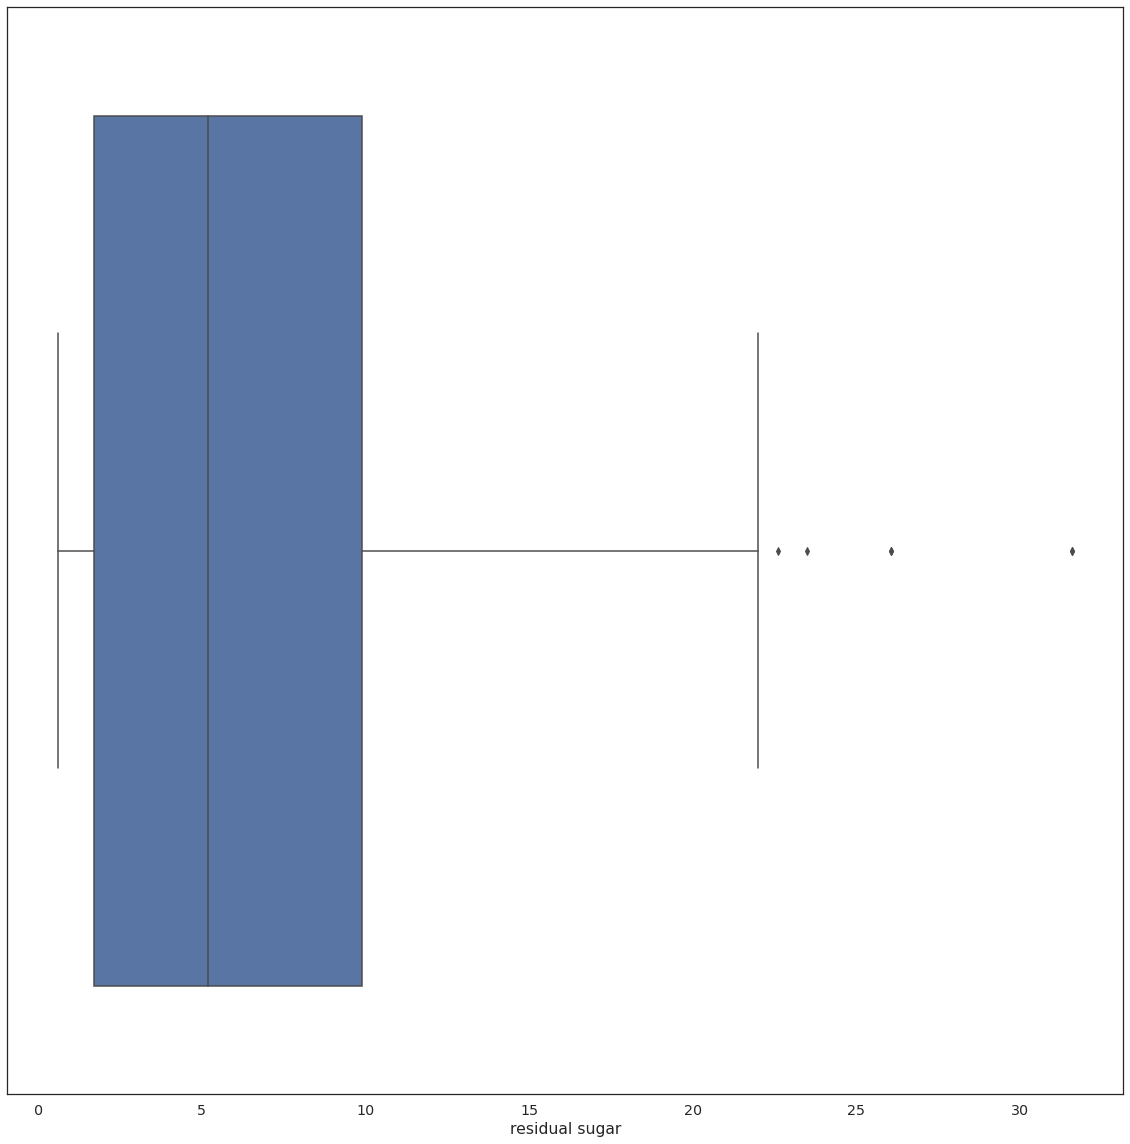

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


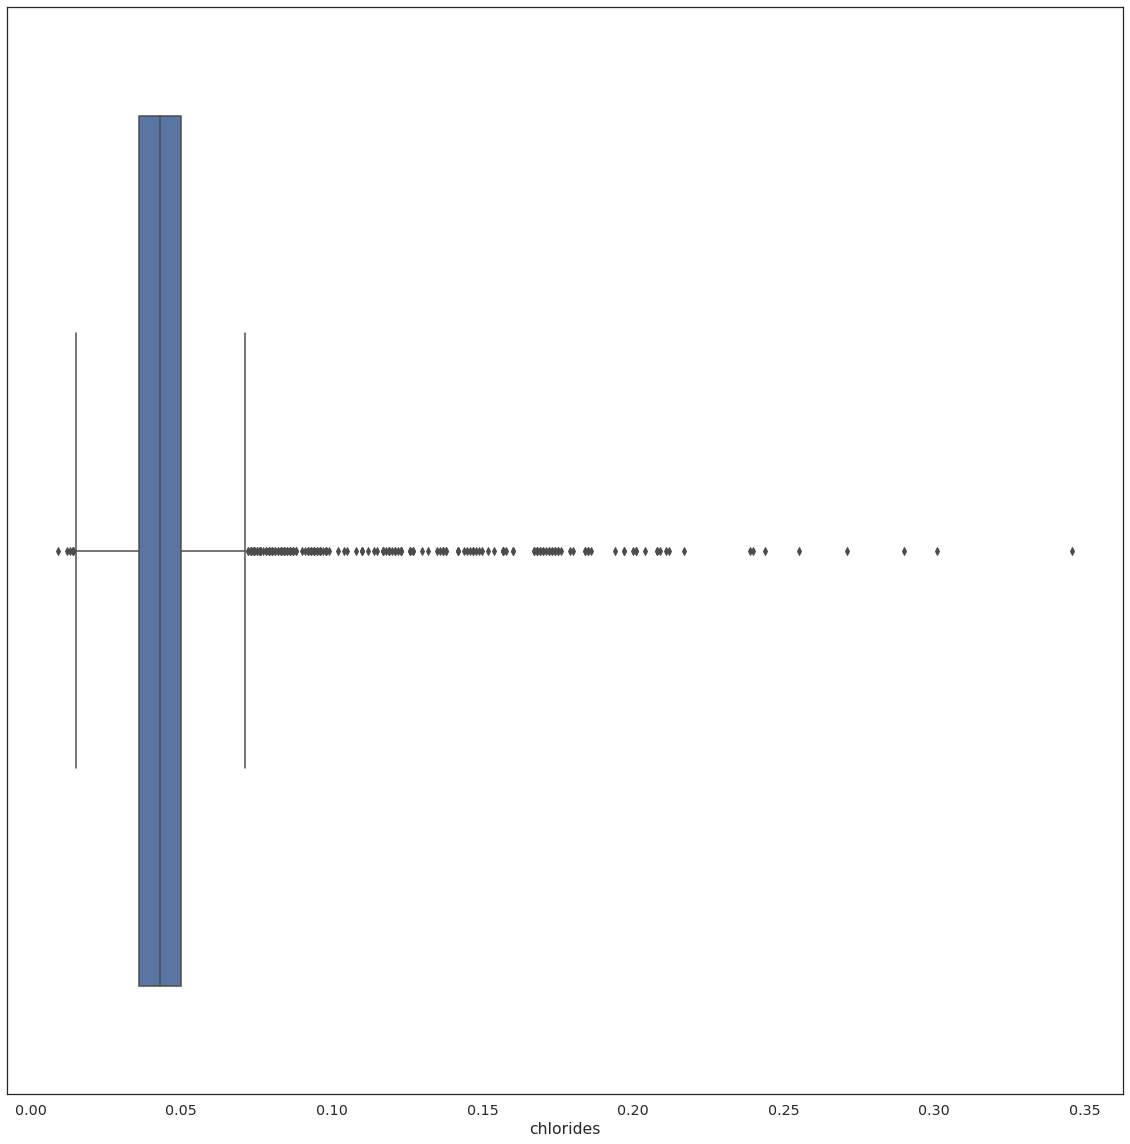

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


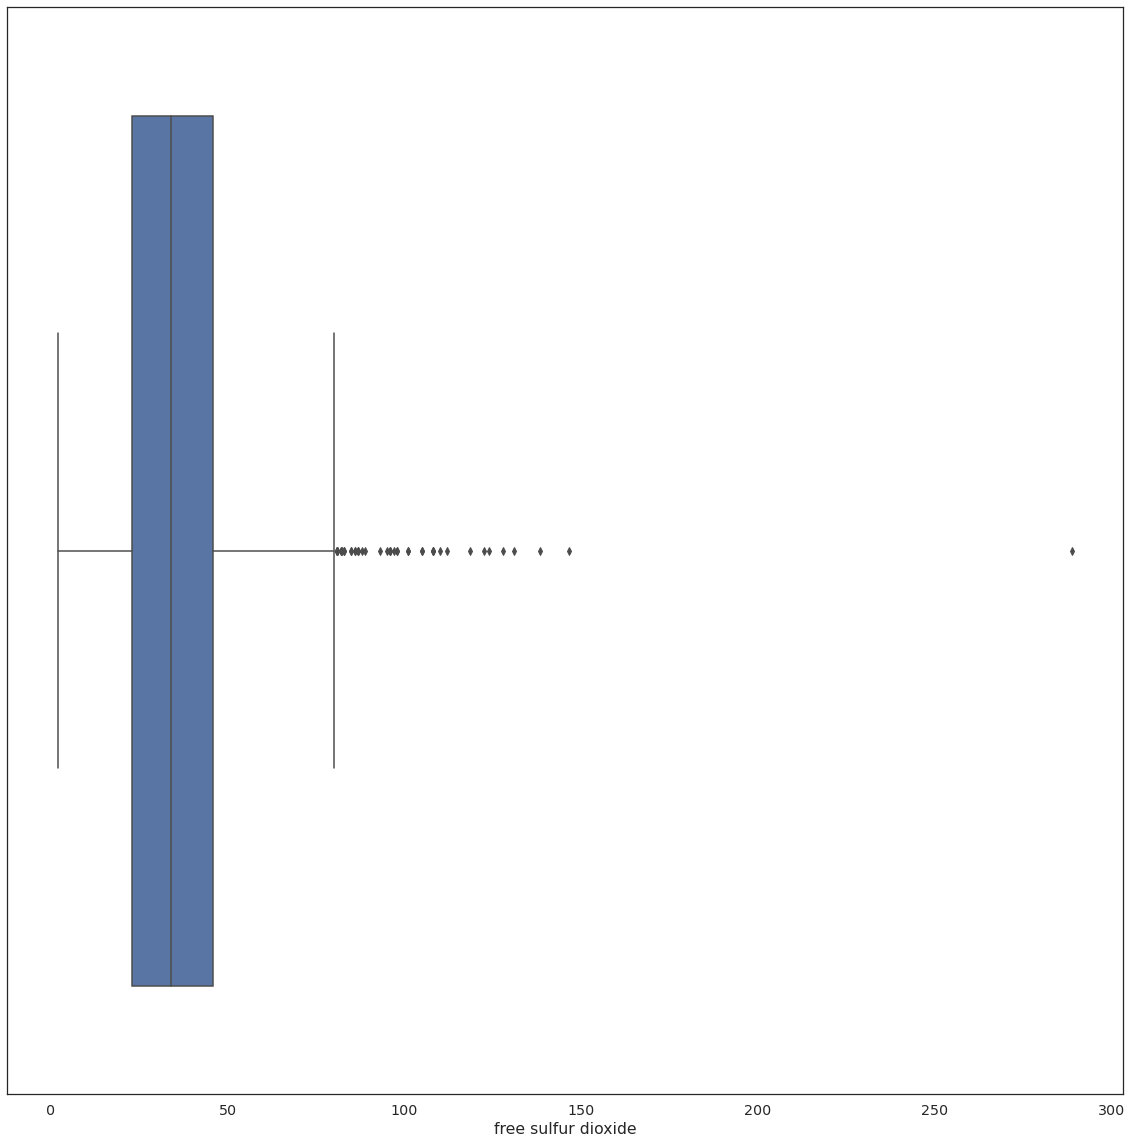

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


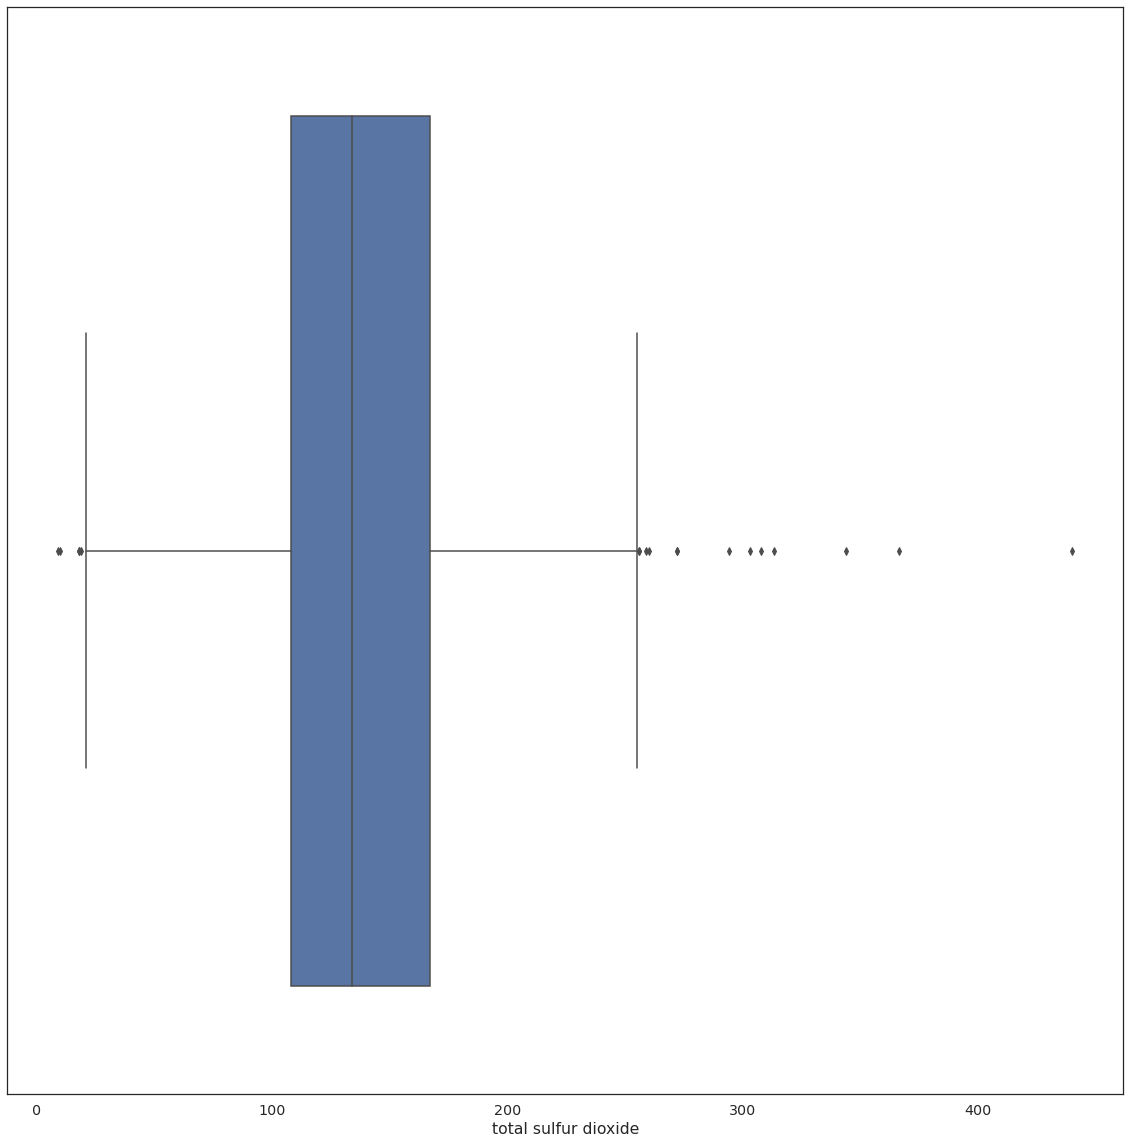

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


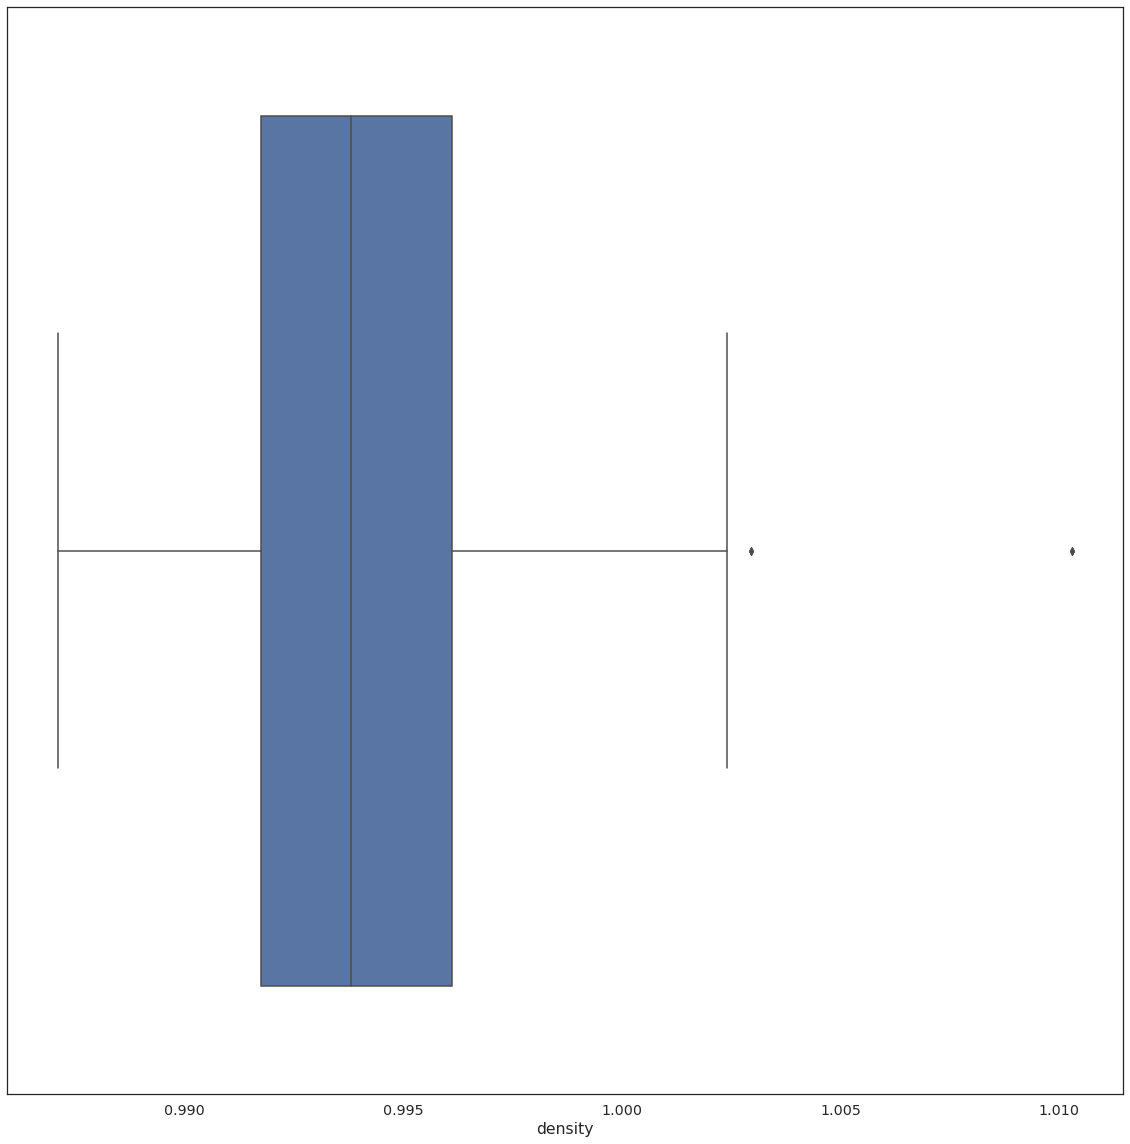

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


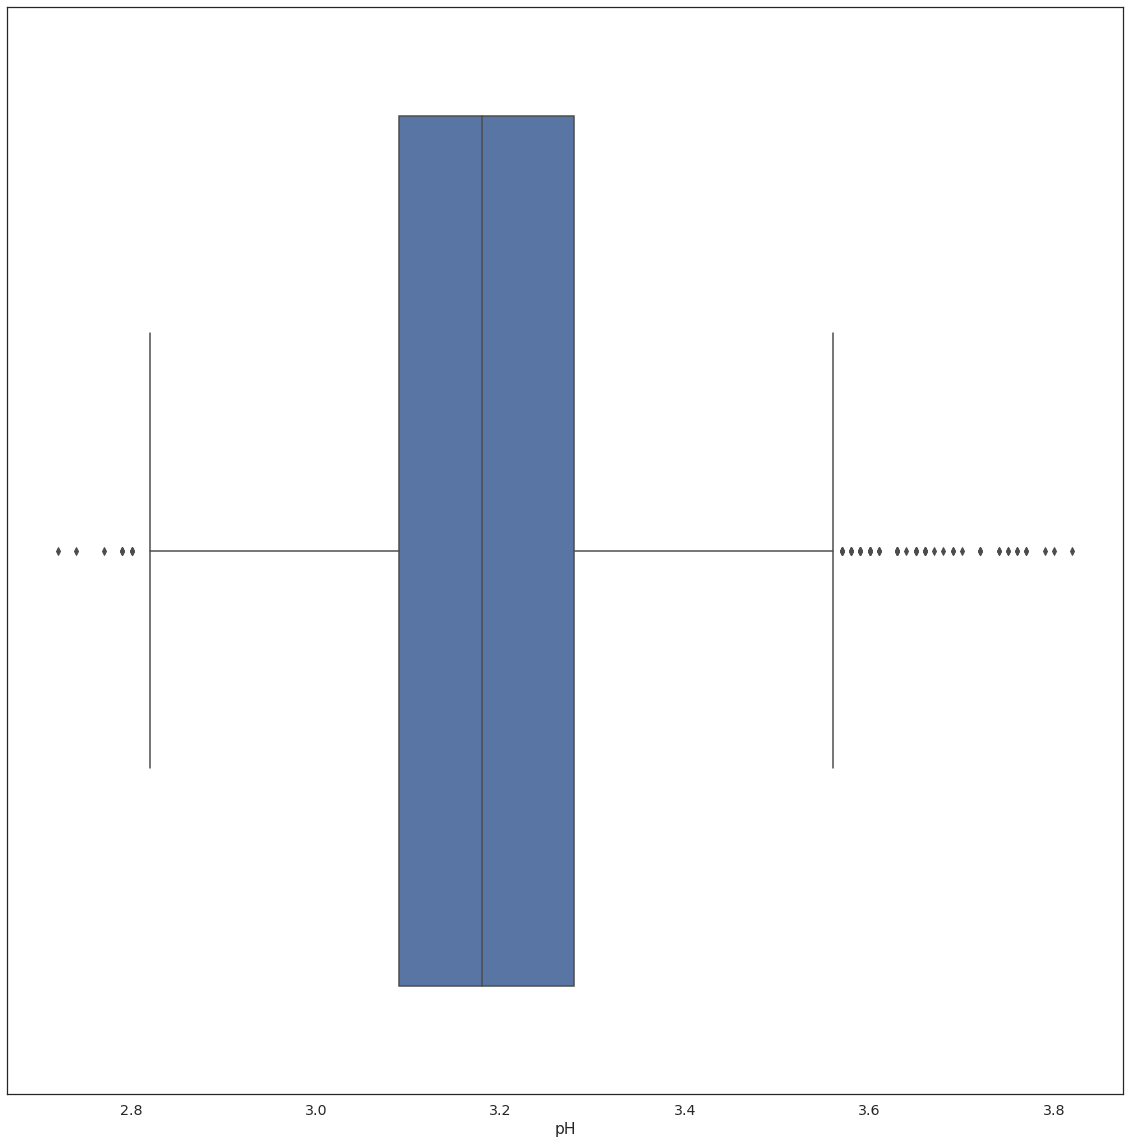

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


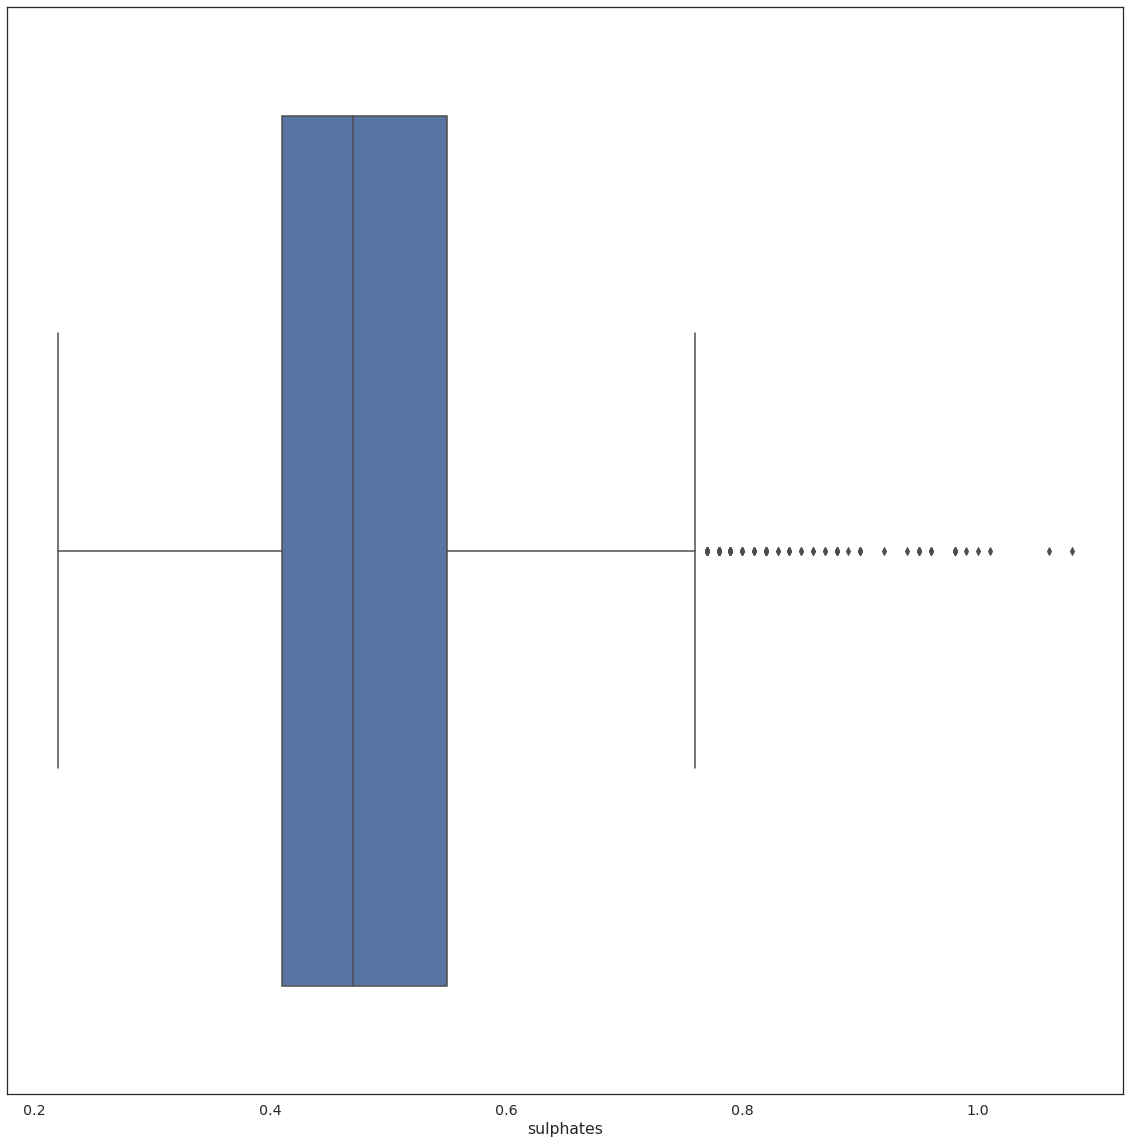

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


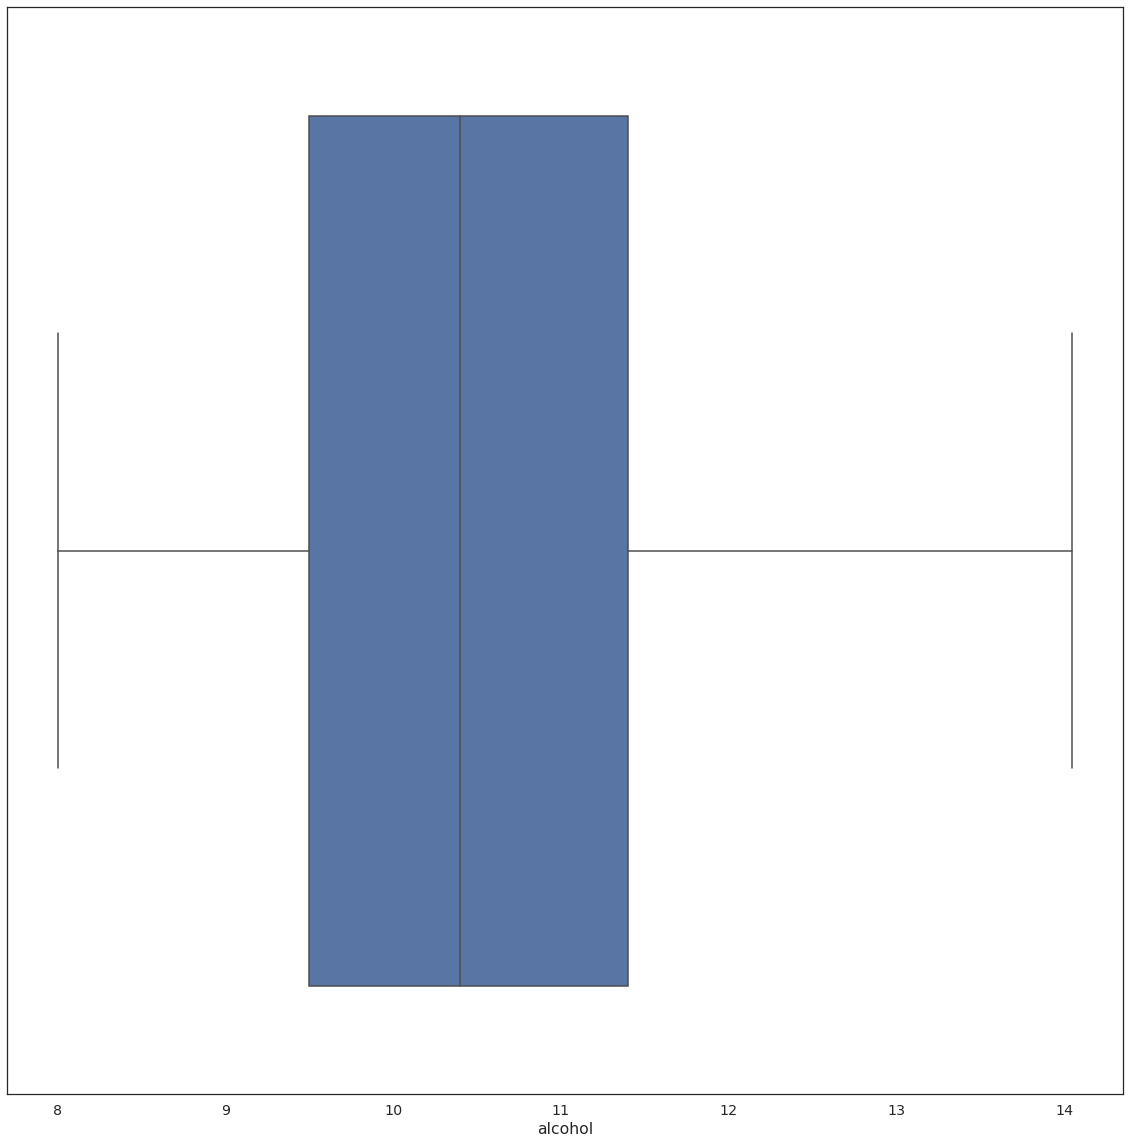

In [17]:
# Outlier analysis
cols = list(data.columns)

#Create boxplot for every numeric feature (cols 0-11) to show outliers
for col in cols[0:-1]:
  plt.figure()
  sns.boxplot(data[col])
  plt.show()

The boxplots indicate half of our preditors contain outliers. Since there are only 169 records in our training dataset, removing rows that contain outliers could leave us with a very small fraction of the original data. We opt to cap the values at the 5th and 95th percentiles to retain as much data as possible.

In [18]:
tmp = data #creating a temporary to avoid accidentally overwriting the original (let's us compare and verify capping)
data_clean = data

In [19]:
cols = list(data.columns)

#Create boxplot for every numeric feature (cols 0-13) to show outliers
for col in cols[0:-1]:
  upper_limit = tmp[col].mean() + 3*tmp[col].std() #~95th percentile
  lower_limit = tmp[col].mean() - 3*tmp[col].std() #~5th percentile
  
  data_clean[col] = np.where(tmp[col]> upper_limit, upper_limit, #if above 95th, set to upper
                        np.where(tmp[col]< lower_limit, lower_limit, #if below 5th, set to lower
                        tmp[col]))


In [20]:
#Capped distributions. Verify by checking max and min
data_clean.describe() 

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4653.000000       4653.000000  4653.000000     4653.000000   
mean        6.850118          0.276365     0.332596        6.397731   
std         0.825395          0.093928     0.114794        4.980920   
min         4.319549          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max         9.389263          0.578803     0.697101       21.430199   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4653.000000          4653.000000           4653.000000  4653.000000   
mean      0.044657            35.177759            138.378840     0.994035   
std       0.015199            16.129989             41.971721     0.002903   
min       0.009000             2.000000             11.153562     0.987110   
25%       0.036000            23.000000            108.000000     0.991750   
50%       0.043000            34.000000            134.000000     0.993800   
75%       0.050000            46.000000            167.000000     0.996120   
max       0.111788            86.420357            265.826021     1.002789   

                pH    sulphates      alcohol      quality  
count  4653.000000  4653.000000  4653.000000  4653.000000  
mean      3.187297     0.488841    10.504821     5.872985  
std       0.148243     0.110615     1.227265     0.884802  
min       2.738384     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.637107     0.830847    14.050000     9.000000

# Training clustering models
Now that the data is clean, we can set up the clustering experiment pipeline. We address some final data cleaning issues in the experiment setup. For example, the values of the Nonflavanoid_Phenols column ranges from 0.13 - 0.66 while Proline ranges from 278 - 1680. This impacts performance on certain clustering algorithms such as k-means, therefore we choose to z-score normalize the features to put them all on the same scale. This is specified in the 'normalize=True' argument. Second, we use the 'transformation=True' argument to transform the features into a more Gaussian (normal) distribution. Next, we address the multicollinearity in the data using the 'remove_multicollinearity' argument. The threshold for multicollinearity was set to 0.7. Inter-correlated features that exceeded the 0.7 threshold were removed, and when two features are highly correlated with each other (for example, Flavanoids and Total_Phenols) the feature that is least correlated with the target variable is removed.

In [22]:
from pycaret.clustering import *

exp_P2cls = setup(data = data_clean, #make sure to use cleaned data (outliers capped)
                   session_id = 123,
                   transformation=True, #applies the power transform to make data more Gaussian-like
                   normalize=True, #transforms the numeric features by scaling them to a given range (default is z-score)
                   remove_multicollinearity=True, #features with the inter-correlations higher than the defined threshold are removed
                   multicollinearity_threshold = 0.7, #by default was 0.9
                )

Description                 Value
0                               session_id                   123
1                            Original Data            (4653, 12)
2                           Missing Values                 False
3                         Numeric Features                    11
4                     Categorical Features                     1
5                         Ordinal Features                 False
6                High Cardinality Features                 False
7                  High Cardinality Method                  None
8                         Transformed Data            (4653, 17)
9                                 CPU Jobs                    -1
10                                 Use GPU                 False
11                          Log Experiment                 False
12                         Experiment Name  cluster-default-name
13                                     USI                  ebb9
14                         Imputation Type                simple
15          Iterative Imputation Iteration                  None
16                         Numeric Imputer                  mean
17      Iterative Imputation Numeric Model                  None
18                     Categorical Imputer                  mode
19  Iterative Imputation Categorical Model                  None
20           Unknown Categoricals Handling        least_frequent
21                               Normalize                  True
22                        Normalize Method                zscore
23                          Transformation                  True
24                   Transformation Method           yeo-johnson
25                                     PCA                 False
26                              PCA Method                  None
27                          PCA Components                  None
28                     Ignore Low Variance                 False
29                     Combine Rare Levels                 False
30                    Rare Level Threshold                  None
31                         Numeric Binning                 False
32                         Remove Outliers                 False
33                      Outliers Threshold                  None
34                Remove Multicollinearity                  True
35             Multicollinearity Threshold                   0.7
36             Remove Perfect Collinearity                 False
37                              Clustering                 False
38                    Clustering Iteration                  None
39                     Polynomial Features                 False
40                       Polynomial Degree                  None
41                    Trignometry Features                 False
42                    Polynomial Threshold                  None
43                          Group Features                 False
44                       Feature Selection                 False
45                Feature Selection Method               classic
46            Features Selection Threshold                  None
47                     Feature Interaction                 False
48                           Feature Ratio                 False
49                   Interaction Threshold                  None

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='UNSUPERVISED_DUMMY_TARGET',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categorical=None,
                                fill_value_numerical=None...
                ('dummy', Dummify(target='UNSUPERVISED_DUMMY_TARGET')),
                ('fix_perfect', 'passthrough'),
                ('clean_names', Clean_Colum_Names()),
                ('feature_select

# Display a list of Models

In [23]:
models()

INFO:logs:gpu_param set to False


Name  \
ID                                            
kmeans                   K-Means Clustering   
ap                     Affinity Propagation   
meanshift             Mean Shift Clustering   
sc                      Spectral Clustering   
hclust             Agglomerative Clustering   
dbscan     Density-Based Spatial Clustering   
optics                    OPTICS Clustering   
birch                      Birch Clustering   
kmodes                   K-Modes Clustering   

                                                   Reference  
ID                                                            
kmeans                        sklearn.cluster._kmeans.KMeans  
ap         sklearn.cluster._affinity_propagation.Affinity...  
meanshift              sklearn.cluster._mean_shift.MeanShift  
sc              sklearn.cluster._spectral.SpectralClustering  
hclust     sklearn.cluster._agglomerative.AgglomerativeCl...  
dbscan                        sklearn.cluster._dbscan.DBSCAN  
optics                        sklearn.cluster._optics.OPTICS  
birch                           sklearn.cluster._birch.Birch  
kmodes                                  kmodes.kmodes.KModes

# Determine the optimal number of clusters for k-means clustering
We used the method described by Tola Alade to determine the optimal number of clusters https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f. We understand that "it is a very subjective method and for some data sets it might not work" (https://www.kaggle.com/getting-started/304396) but we decided to use it as a starting point.

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7fd3f64b4e50>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 584, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 725, in _make_controller_from_path
    lib_controller = lib_controller_class(
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 842, in __init__
    super().__init__(**kwargs)
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 810, in __init__
    self._dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.8/ctypes/__init__.py", line 373, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: /usr/local/lib/python3.8/dist-packages/numpy.libs/libopenblas64_p-r0-2f7c42d4.3.18.so: cannot open shar

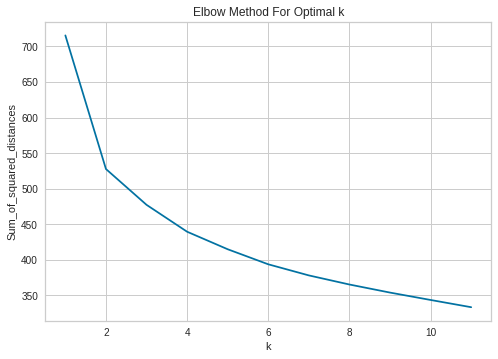

In [24]:
# Import required packages
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

mms = MinMaxScaler()
mms.fit(dataset)
data_transformed = mms.transform(dataset)

Sum_of_squared_distances = []
K = range(1,12)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

The elbow could be at 2, 4 or 6. We are going to investigate all three of these cases to see which one is best.

# Create a Model

# Investigate using 2 clusters

In [25]:
kmeans2 = create_model('kmeans', num_clusters=2)

Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0      0.1674           1014.517            2.05            0           0   

   Completeness  
0             0

INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=123, tol=0.0001, verbose=0)
INFO:logs:create_model() succesfully completed......................................


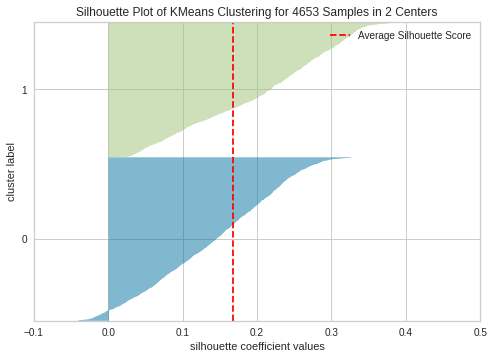

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [26]:
plot_model(kmeans2, plot = 'silhouette')

In [27]:
plot_model(kmeans2)

INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [28]:
plot_model(kmeans2, plot = 'distribution') #to see size of clusters

INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


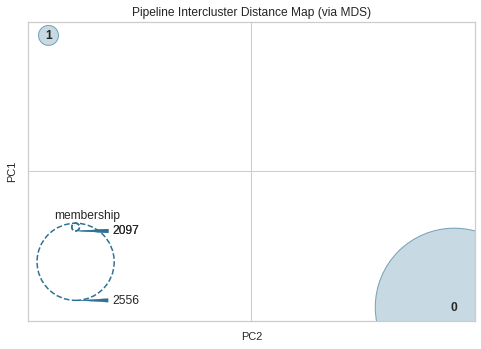

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [29]:
plot_model(kmeans2, plot = 'distance')

In [30]:
plot_model(kmeans2, plot = 'tsne')

INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


# Investigate using 4 clusters

In [31]:
kmeans4 = create_model('kmeans', num_clusters=4)

Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0      0.1283           637.2897          2.1708            0           0   

   Completeness  
0             0

INFO:logs:create_model_container: 2
INFO:logs:master_model_container: 2
INFO:logs:display_container: 3
INFO:logs:KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=123, tol=0.0001, verbose=0)
INFO:logs:create_model() succesfully completed......................................


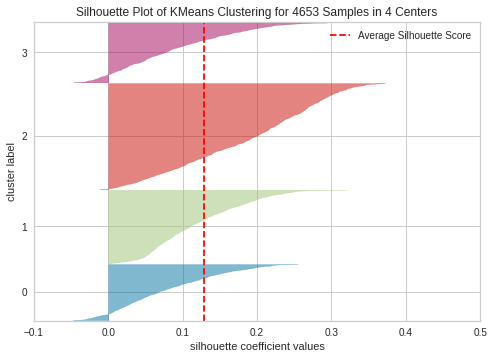

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [32]:
plot_model(kmeans4, plot = 'silhouette')

In [33]:
plot_model(kmeans4)

INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [34]:
plot_model(kmeans4, plot = 'distribution') #to see size of clusters

INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


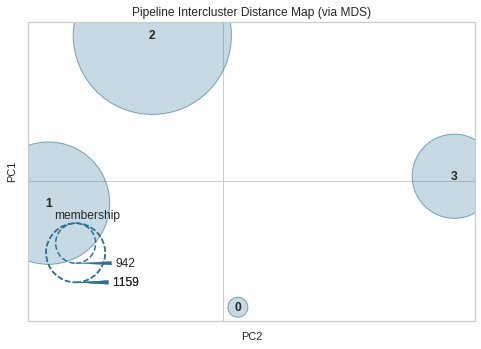

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [35]:
plot_model(kmeans4, plot = 'distance')

In [36]:
plot_model(kmeans4, plot = 'tsne')

INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


# Investigate using 6 clusters

In [37]:
kmeans6 = create_model('kmeans', num_clusters=6)

Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0      0.1115           510.1232          2.1262            0           0   

   Completeness  
0             0

INFO:logs:create_model_container: 3
INFO:logs:master_model_container: 3
INFO:logs:display_container: 4
INFO:logs:KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=123, tol=0.0001, verbose=0)
INFO:logs:create_model() succesfully completed......................................


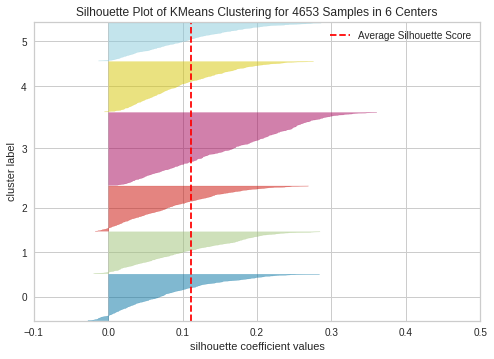

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [38]:
plot_model(kmeans6, plot = 'silhouette')

In [39]:
plot_model(kmeans6)

INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [40]:
plot_model(kmeans6, plot = 'distribution') #to see size of clusters

INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


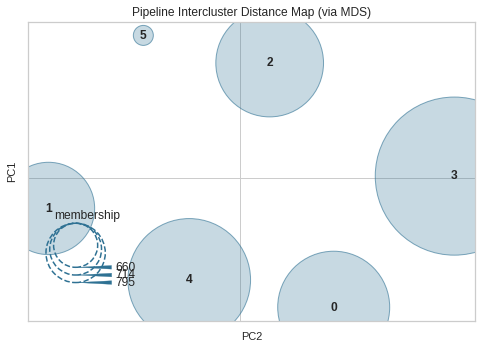

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [41]:
plot_model(kmeans6, plot = 'distance')

In [42]:
plot_model(kmeans6, plot = 'tsne')

INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


# Assign a Model

Out of the initial three, using 2 clusters has the highest Silhouette Coefficient (0.1674) and Calinski-Harabasz Index (1014.517) but lowest Bouldin Score (2.05). These values were only slighter better than the other two options. The Silhoutte Coefficient represents how similar an object is to its own cluster.  The Calinski-Harabasz Index represents how similar an object is to its own cluster compared to other clusters. The  Bouldin Index is a ratio between the cluster scatter and the cluster's separation and a lower value will mean that the clustering is better. Going forward we will use 2 clusters.

In [43]:
kmean_results = assign_model(kmeans2)
kmean_results

INFO:logs:Initializing assign_model()
INFO:logs:assign_model(model=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=123, tol=0.0001, verbose=0), transformation=False, score=True, verbose=True)
INFO:logs:Checking exceptions
INFO:logs:Determining Trained Model
INFO:logs:Trained Model : K-Means Clustering
INFO:logs:Copying data
INFO:logs:(4653, 13)
INFO:logs:assign_model() succesfully completed......................................


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.9              0.28         0.49             7.7      0.045   
1               5.0              0.24         0.19             5.0      0.043   
2               8.3              0.26         0.31             2.0      0.029   
3               7.7              0.25         0.30             7.8      0.038   
4               4.4              0.32         0.39             4.3      0.030   
...             ...               ...          ...             ...        ...   
4648            7.2              0.08         0.49             1.3      0.050   
4649            7.6              0.10         0.33             1.0      0.031   
4650            6.6              0.24         0.29             2.0      0.023   
4651            7.3              0.24         0.39             3.6      0.024   
4652            8.2              0.17         0.32             1.5      0.050   

      free sulfur dioxide  total sulfur dioxide  density        pH  sulphates  \
0                    48.0                 195.0  0.99540  3.040000       0.55   
1                    17.0                 101.0  0.99438  3.637107       0.57   
2                    14.0                 141.0  0.99077  2.950000       0.77   
3                    67.0                 196.0  0.99555  3.100000       0.50   
4                    31.0                 127.0  0.98904  3.460000       0.36   
...                   ...                   ...      ...       ...        ...   
4648                 18.0                 148.0  0.99450  3.460000       0.44   
4649                 33.0                  93.0  0.99094  3.060000       0.68   
4650                 19.0                  86.0  0.99000  3.250000       0.45   
4651                 35.0                 116.0  0.99280  3.170000       0.51   
4652                 17.0                 101.0  0.99400  3.140000       0.58   

      alcohol  quality    Cluster  
0        11.0        6  Cluster 1  
1        10.0        5  Cluster 0  
2        12.2        6  Cluster 0  
3        10.1        5  Cluster 1  
4        12.8        8  Cluster 0  
...       ...      ...        ...  
4648     10.2        6  Cluster 0  
4649     11.2        6  Cluster 0  
4650     12.5        6  Cluster 0  
4651     10.9        5  Cluster 0  
4652      9.5        5  Cluster 0  

[4653 rows x 13 columns]

# Predict on unseen data
As a demonstration of how the model works, we predict the quality of wines in the 5% holdout data that we removed at the begining of the notebook before feature engineering.

In [44]:
# 5% sample witheld in the beginning
data_unseen.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            8.1              0.28         0.40             6.9      0.050   
1            8.6              0.23         0.40             4.2      0.035   
2            6.6              0.16         0.40             1.5      0.044   
3            7.4              0.34         0.42             1.1      0.033   
4            6.0              0.19         0.26            12.4      0.048   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 30.0                  97.0   0.9951  3.26       0.44   
1                 17.0                 109.0   0.9947  3.14       0.53   
2                 48.0                 143.0   0.9912  3.54       0.52   
3                 17.0                 171.0   0.9917  3.12       0.53   
4                 50.0                 147.0   0.9972  3.30       0.36   

   alcohol  quality  
0     10.1        6  
1      9.7        5  
2     12.4        7  
3     11.3        6  
4      8.9        6

In [45]:
unseen_predictions = predict_model(kmeans2, data=data_unseen)
unseen_predictions

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=123, tol=0.0001, verbose=0), ml_usecase=MLUsecase.CLUSTERING)


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0              8.1              0.28         0.40             6.9      0.050   
1              8.6              0.23         0.40             4.2      0.035   
2              6.6              0.16         0.40             1.5      0.044   
3              7.4              0.34         0.42             1.1      0.033   
4              6.0              0.19         0.26            12.4      0.048   
..             ...               ...          ...             ...        ...   
240            5.3              0.31         0.38            10.5      0.031   
241            5.5              0.16         0.31             1.2      0.026   
242            6.6              0.29         0.73             2.2      0.027   
243            6.2              0.23         0.38             1.6      0.044   
244            6.2              0.38         0.42             2.5      0.038   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                   30.0                  97.0  0.99510  3.26       0.44   
1                   17.0                 109.0  0.99470  3.14       0.53   
2                   48.0                 143.0  0.99120  3.54       0.52   
3                   17.0                 171.0  0.99170  3.12       0.53   
4                   50.0                 147.0  0.99720  3.30       0.36   
..                   ...                   ...      ...   ...        ...   
240                 53.0                 140.0  0.99321  3.34       0.46   
241                 31.0                  68.0  0.98980  3.33       0.44   
242                 21.0                  92.0  0.99000  3.12       0.48   
243                 12.0                 113.0  0.99176  3.30       0.73   
244                 34.0                 117.0  0.99132  3.36       0.59   

     alcohol  quality    Cluster  
0      10.10        6  Cluster 0  
1       9.70        5  Cluster 0  
2      12.40        7  Cluster 0  
3      11.30        6  Cluster 0  
4       8.90        6  Cluster 1  
..       ...      ...        ...  
240    11.70        6  Cluster 0  
241    11.65        6  Cluster 0  
242    12.40        6  Cluster 0  
243    11.40        5  Cluster 0  
244    11.60        7  Cluster 0  

[245 rows x 13 columns]

# Saving the model

In [46]:
#save model
save_model(kmeans2,'kmeans_final_pipeline')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=123, tol=0.0001, verbose=0), model_name=kmeans_final_pipeline, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='UNSUPERVISED_DUMMY_TARGET',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categorical=None,
                                fill_value_numerical=None...
              

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='UNSUPERVISED_DUMMY_TARGET',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='most frequent',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None...
                  Fix_multicollinearity(correlation_with_target_preference=None,
                                        correlation_with_target_threshold=0.0,
                                        target_variable='UNSUPERVISED_DUMMY_TARGET',
                                        threshold=0.7)),
     

# Conclusions
"The more residual sugar remaining in a wine, the sweeter the wine is" (https://whicherridge.com.au/blog/what-is-residual-sugar-in-wine/#:~:text=Sweetness%20in%20wine%20is%20called,the%20sweeter%20the%20wine%20is.). Cluster 1, on average, has significantly more residual sugar than Cluster 0.  In fact, Cluster 1, has 21 of sweetest wines in the modeling dataset.

Cluster 1, on average, is more dense than Cluster 0. "Full bodied wines are often considered the antithesis to a light bodied wine. While a light bodied wine is easy to drink and pairs well with a variety of foods, a full bodied wine is a little heavier with bold tasting notes, complex flavors, and a powerful aroma. These wines are typically meant to be sipped over a prolonged period since they are so bold. (https://www.wtso.com/blog/what-is-the-difference-between-full-medium-or-light-bodied-wine/#:~:text=Full%20bodied%20wines%20are%20often,flavors%2C%20and%20a%20powerful%20aroma.)". On the flipside, Cluster 0 since on average its a less dense wine, "it’s an easy drinking wine that pairs well with other light and lean foods, like chicken and salmon." (https://www.wtso.com/blog/what-is-the-difference-between-full-medium-or-light-bodied-wine/#:~:text=Full%20bodied%20wines%20are%20often,flavors%2C%20and%20a%20powerful%20aroma.)). Cluster 0 has 300+ of the lowest density wines in the modeling dataset.

We found that residual sugar is highly correlated with density in the exploratory data analysis and this agrees with the findings above.

"In wines, the concentration of chloride ions is generally indicative of the presence of sodium chloride.
Sodium chloride adds to the saltiness of a wine, which can contribute to or detract from the overall
taste and quality of the wine. (https://mantech-inc.com/wp-content/uploads/2014/07/105-Chloride-in-Wine-by-Titration.pdf)". Cluster 0, has 100+ of the least saltiest wines in the modeling dataset. On the flipside, Cluster 1, has 21 of the saltiest wines in the modeling dataset.

Cluster 0 has 20+ of the highest levels of alcohol in the modeling dataset.

"In the wine industry, sulfur dioxide (SO2) is frequently added to must and juice as a preservative to prevent bacterial growth and slow down the process of oxidation by inhibiting oxidative enzymes. SO2 also improves the taste and retains the wine's fruity flavors and freshness of aroma (In the wine industry, sulfur dioxide (SO2) is frequently added to must and juice as a preservative to prevent bacterial growth and slow down the process of oxidation by inhibiting oxidative enzymes. SO2 also improves the taste and retains the wine's fruity flavors and freshness of aroma )". Cluster 1 has 23 of the highest levels of free sulfur dioxide and total sulfur dioxide in the modeling dataset.

For quality, Cluster 0 has 3 out of 4 of the top quality wines with a rating of 9 in the modeling dataset. Cluster 0 had 132 out of 164 wines in the modeling dataset with a quality of 8.